In [2]:
!unzip "/content/drive/MyDrive/Digitalxray.zip"

Archive:  /content/drive/MyDrive/Digitalxray.zip
  inflating: MedicalExpert-I/0Normal/NormalG0 (1).png  
  inflating: MedicalExpert-I/0Normal/NormalG0 (10).png  
  inflating: MedicalExpert-I/0Normal/NormalG0 (100).png  
  inflating: MedicalExpert-I/0Normal/NormalG0 (101).png  
  inflating: MedicalExpert-I/0Normal/NormalG0 (102).png  
  inflating: MedicalExpert-I/0Normal/NormalG0 (103).png  
  inflating: MedicalExpert-I/0Normal/NormalG0 (104).png  
  inflating: MedicalExpert-I/0Normal/NormalG0 (105).png  
  inflating: MedicalExpert-I/0Normal/NormalG0 (106).png  
  inflating: MedicalExpert-I/0Normal/NormalG0 (107).png  
  inflating: MedicalExpert-I/0Normal/NormalG0 (108).png  
  inflating: MedicalExpert-I/0Normal/NormalG0 (109).png  
  inflating: MedicalExpert-I/0Normal/NormalG0 (11).png  
  inflating: MedicalExpert-I/0Normal/NormalG0 (110).png  
  inflating: MedicalExpert-I/0Normal/NormalG0 (111).png  
  inflating: MedicalExpert-I/0Normal/NormalG0 (112).png  
  inflating: MedicalExpert-

In [3]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.utils import shuffle
import random
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,BatchNormalization,Dropout,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import Xception

In [4]:
# function to display images
def show_images(path):
    labels = list(os.listdir(path))
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
    random_indices = random.sample(range(1, 101), 10)

    for i, idx in enumerate(random_indices, 1):
        file_path = os.path.join(path, labels[idx])
        image = Image.open(file_path)
        subplot_row = (i - 1) // 5
        subplot_col = (i - 1) % 5
        axes[subplot_row, subplot_col].imshow(image)
        axes[subplot_row, subplot_col].axis('off')
    plt.tight_layout()
    plt.show()

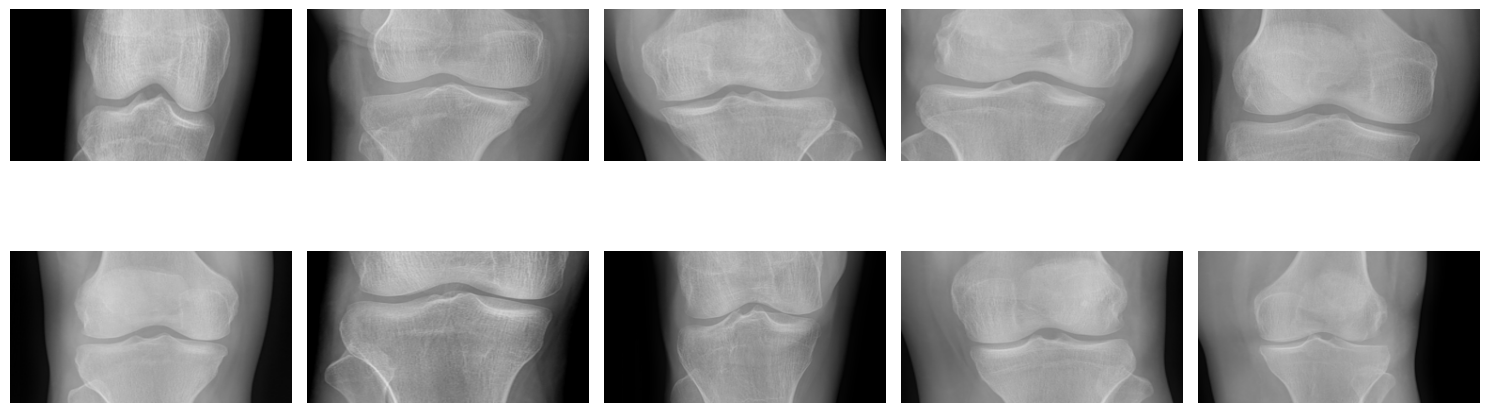

In [5]:
show_images('/content/MedicalExpert-I/0Normal')

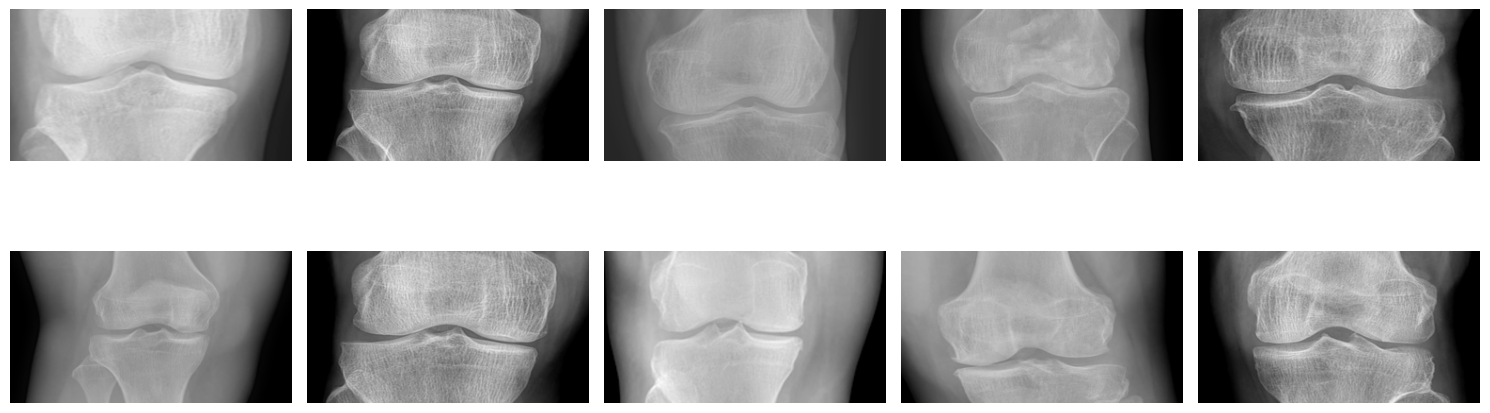

In [6]:
show_images('/content/MedicalExpert-I/1Doubtful')

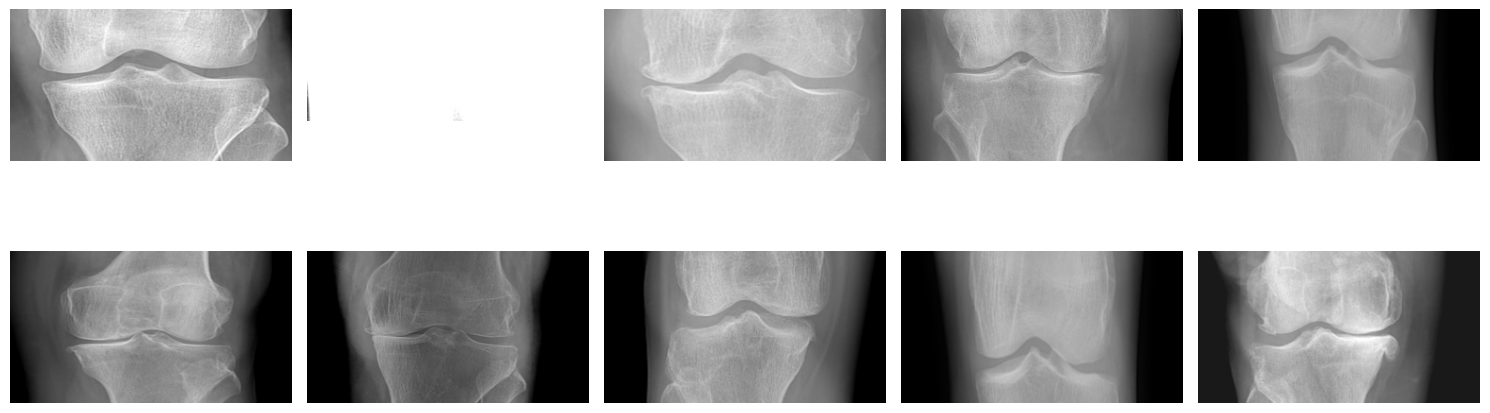

In [7]:
show_images('/content/MedicalExpert-I/2Mild')

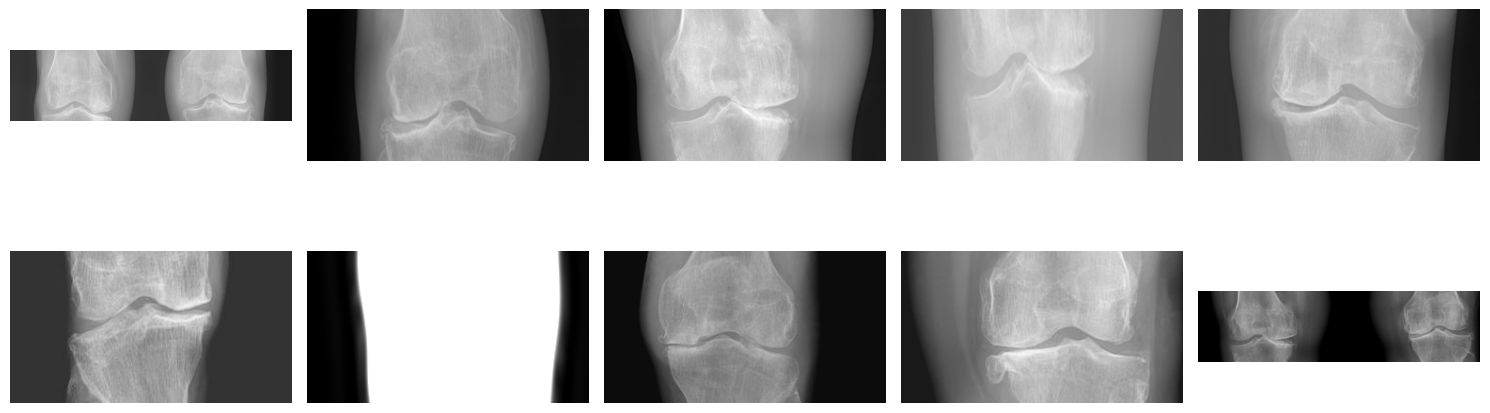

In [8]:
show_images('/content/MedicalExpert-I/3Moderate')

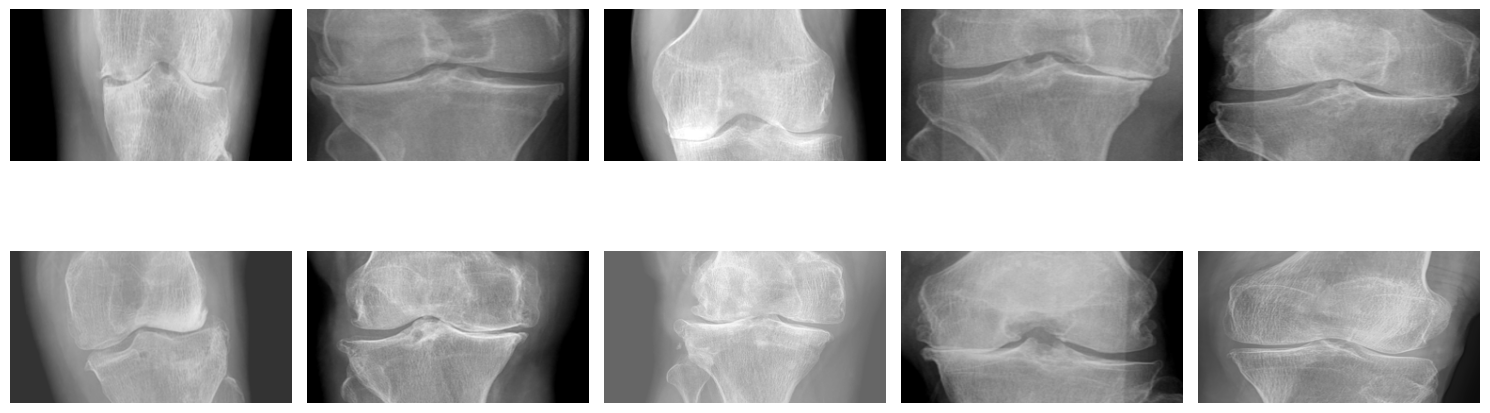

In [9]:
show_images('/content/MedicalExpert-I/4Severe')

In [10]:
# Reading and merging the data
def read_data(path,image_size,classes):
    X = []
    y = []
    gamma = 1.8
    labels = os.listdir(path)
    for label in labels:
        try:
            for image in os.listdir(path + '/' +label):
                img = cv2.imread(path + '/' +label + '/' + image)
                img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
                img = cv2.resize(img,(image_size, image_size))
                X.append(img)
                y.append(classes[label])
        except:
            pass
    return np.array(X), np.array(y)

In [11]:
knee2_classes = {'0Normal': 0, '1Doubtful' : 1, '2Mild' : 2, '3Moderate' : 3,'4Severe' : 4}
x_traindig_knee,y_traindig_knee = read_data('/content/MedicalExpert-I',200,knee2_classes)
x_testdig_knee,y_testdig_knee = read_data('/content/MedicalExpert-II',200,knee2_classes)
x_traindig_knee,y_traindig_knee = shuffle(x_traindig_knee,y_traindig_knee ,random_state = 42)
x_testdig_knee,y_testdig_knee = shuffle(x_testdig_knee,y_testdig_knee,random_state = 42)

In [12]:
x_knee = np.concatenate((x_traindig_knee,x_testdig_knee))
x_knee.shape

(3300, 200, 200)

In [13]:
y_knee = np.concatenate((y_traindig_knee,y_testdig_knee))
y_knee.shape

(3300,)

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x_knee,y_knee,test_size = 0.25,random_state = 42)

In [15]:
print(x_train.shape)
print(x_test.shape)

(2475, 200, 200)
(825, 200, 200)


In [16]:
print(x_train.max(),x_train.min())
print(x_test.max(),x_test.min())
x_train = x_train / 255
x_test = x_test / 255
print(x_train.max(),x_train.min())
print(x_test.max(),x_test.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [17]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [18]:
y_train.shape

(2475, 5)

In [19]:
from keras.layers import *
img_input = Input(shape=(200,200, 1))
img_conc = Concatenate()([img_input, img_input, img_input])
Model3= Xception(input_tensor=img_conc, include_top=False)
#include_top=false removes the classification layer that was trained on ImageNet
#dataset
Model3.trainable=False #set the model as not trainable.
#preprocessing input
Model3.summary()

83683744/83683744 [==============================] - 2s 0us/step
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 200, 200, 1)]        0         []                            
                                                                                                  
 concatenate (Concatenate)   (None, 200, 200, 3)          0         ['input_1[0][0]',             
                                                                     'input_1[0][0]',             
                                                                     'input_1[0][0]']             
                                                                                                  
 block1_conv1 (Conv2D)       (None, 99, 99, 32)           864       ['concatenate[0][0]']         
                          

In [20]:
Model3.trainable=True
set_trainable=False

for layer in Model3.layers:
  if layer.name=='block12_sepconv1_act':
    set_trainable=True
  if set_trainable:
    layer.trainable=True
  else:
    layer.trainable=False

for layer in Model3.layers:
  print(layer.name,layer.trainable)

input_1 False
concatenate False
block1_conv1 False
block1_conv1_bn False
block1_conv1_act False
block1_conv2 False
block1_conv2_bn False
block1_conv2_act False
block2_sepconv1 False
block2_sepconv1_bn False
block2_sepconv2_act False
block2_sepconv2 False
block2_sepconv2_bn False
conv2d False
block2_pool False
batch_normalization False
add False
block3_sepconv1_act False
block3_sepconv1 False
block3_sepconv1_bn False
block3_sepconv2_act False
block3_sepconv2 False
block3_sepconv2_bn False
conv2d_1 False
block3_pool False
batch_normalization_1 False
add_1 False
block4_sepconv1_act False
block4_sepconv1 False
block4_sepconv1_bn False
block4_sepconv2_act False
block4_sepconv2 False
block4_sepconv2_bn False
conv2d_2 False
block4_pool False
batch_normalization_2 False
add_2 False
block5_sepconv1_act False
block5_sepconv1 False
block5_sepconv1_bn False
block5_sepconv2_act False
block5_sepconv2 False
block5_sepconv2_bn False
block5_sepconv3_act False
block5_sepconv3 False
block5_sepconv3_bn Fa

In [21]:
model = Sequential()

In [22]:
# model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(200, 200, 1)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(256, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(512, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
model.add(Model3)
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 256)               25690368  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [24]:
model.fit(x_train,y_train,epochs = 150,validation_data = (x_test,y_test))

Epoch 1/150
78/78 [==============================] - 40s 266ms/step - loss: 1.7357 - accuracy: 0.3042 - val_loss: 1.7432 - val_accuracy: 0.3176
Epoch 2/150
78/78 [==============================] - 15s 197ms/step - loss: 1.3672 - accuracy: 0.3758 - val_loss: 1.9193 - val_accuracy: 0.4970
Epoch 3/150
78/78 [==============================] - 16s 202ms/step - loss: 1.0950 - accuracy: 0.5539 - val_loss: 7.8809 - val_accuracy: 0.4570
Epoch 4/150
78/78 [==============================] - 16s 207ms/step - loss: 0.8488 - accuracy: 0.6691 - val_loss: 1.5891 - val_accuracy: 0.6764
Epoch 5/150
78/78 [==============================] - 17s 214ms/step - loss: 0.6690 - accuracy: 0.7390 - val_loss: 3.0300 - val_accuracy: 0.6388
Epoch 6/150
78/78 [==============================] - 19s 242ms/step - loss: 0.6371 - accuracy: 0.7919 - val_loss: 8.2805 - val_accuracy: 0.6424
Epoch 7/150
78/78 [==============================] - 16s 208ms/step - loss: 0.5219 - accuracy: 0.8376 - val_loss: 0.6652 - val_accuracy:

In [25]:
predictions = np.argmax(model.predict(x_test),1)

26/26 [==============================] - 4s 117ms/step


In [26]:
print("Target variable shape:", y_train.shape)
print("Model output shape:", model.output_shape)

Target variable shape: (2475, 5)
Model output shape: (None, 5)


In [27]:
y_train

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [28]:
ytrue = np.argmax(y_test,axis = 1)
print( confusion_matrix(y_true= ytrue,y_pred = predictions) )

[[239  21   2   0   0]
 [  2 220   4   0   4]
 [  0  10 100   4   3]
 [  0   0   3 110   0]
 [  0   6   2   2  93]]


In [29]:
print(classification_report(y_true= ytrue,y_pred = predictions))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       262
           1       0.86      0.96      0.90       230
           2       0.90      0.85      0.88       117
           3       0.95      0.97      0.96       113
           4       0.93      0.90      0.92       103

    accuracy                           0.92       825
   macro avg       0.93      0.92      0.92       825
weighted avg       0.93      0.92      0.92       825



In [30]:
model.save('digitalkneexception.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
